In [ ]:
# Student Score Prediction

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display the first few rows
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [3]:
# Drop rows with missing values in the identified columns
df.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], inplace=True)

# Check for missing values again to confirm
print("\nMissing values after dropping rows:")
print(df.isnull().sum())

# Check data types of relevant columns
print("\nData types of relevant columns:")
print(df[['Hours_Studied', 'Exam_Score']].dtypes)


Missing values after dropping rows:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Data types of relevant columns:
Hours_Studied    int64
Exam_Score       int64
dtype: object


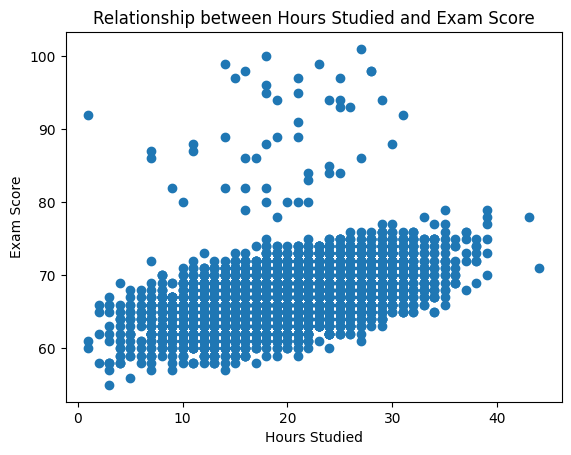

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['Hours_Studied'], df['Exam_Score'])

# Add title and labels
plt.title('Relationship between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

# Display the plot
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# Define feature variable X and reshape it
X = df['Hours_Studied'].values.reshape(-1, 1)

# Define target variable y
y = df['Exam_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (5102, 1)
Testing set shape (X_test): (1276, 1)
Training set shape (y_train): (5102,)
Testing set shape (y_test): (1276,)


In [6]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

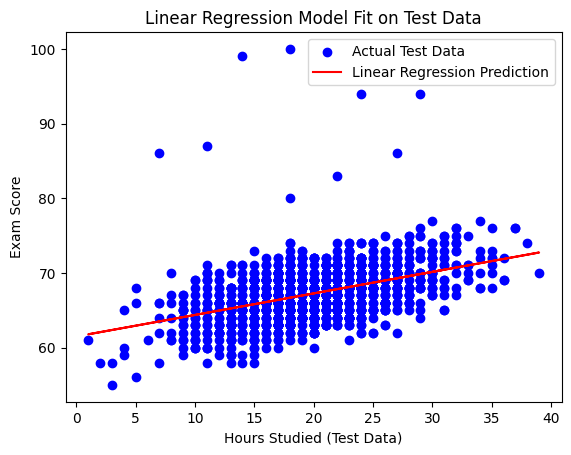

In [7]:
# Create a scatter plot of the actual test data
plt.scatter(X_test, y_test, label='Actual Test Data', color='blue')

# Plot the linear regression line
plt.plot(X_test, linear_model.predict(X_test), label='Linear Regression Prediction', color='red')

# Add title and labels
plt.title('Linear Regression Model Fit on Test Data')
plt.xlabel('Hours Studied (Test Data)')
plt.ylabel('Exam Score')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 12.35
R-squared (R2) Score: 0.21


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 3. Train a new LinearRegression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# 4. Make predictions on the polynomial features of the testing data
y_pred_poly = poly_model.predict(X_test_poly)

# 5. Calculate the Mean Squared Error (MSE) and R-squared (R2) score
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# 6. Print the calculated MSE and R2 scores for the polynomial regression model
print(f"Polynomial Regression Model Performance (Degree 2):")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R-squared (R2) Score: {r2_poly:.2f}")

# 7. Compare these metrics to the linear regression model (mse and r2 are already available)
print("\nComparison with Linear Regression Model:")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2: {r2:.2f}")

Polynomial Regression Model Performance (Degree 2):
Mean Squared Error (MSE): 12.35
R-squared (R2) Score: 0.21

Comparison with Linear Regression Model:
Linear Regression MSE: 12.35
Linear Regression R2: 0.21


In [11]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


**Reasoning**:
Based on the dataframe columns, the column name is 'Extracurricular_Activities' instead of 'Class_Participation'. I will use the correct column name and proceed with selecting features, handling categorical variables, splitting data, training the model, predicting, evaluating, and printing the results.



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Select features (including categorical ones)
selected_features = ['Hours_Studied', 'Sleep_Hours', 'Extracurricular_Activities', 'Parental_Involvement']
X_exp = df[selected_features]
y_exp = df['Exam_Score']

# Handle categorical features using one-hot encoding
X_exp = pd.get_dummies(X_exp, columns=['Extracurricular_Activities', 'Parental_Involvement'], drop_first=True)

# Split the data with selected features
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)

# Train a LinearRegression model
linear_model_exp = LinearRegression()
linear_model_exp.fit(X_train_exp, y_train_exp)

# Make predictions
y_pred_exp = linear_model_exp.predict(X_test_exp)

# Calculate MSE and R2
mse_exp = mean_squared_error(y_test_exp, y_pred_exp)
r2_exp = r2_score(y_test_exp, y_pred_exp)

# Print the evaluation metrics
print(f"Model Performance with selected features ({selected_features}):")
print(f"Mean Squared Error (MSE): {mse_exp:.2f}")
print(f"R-squared (R2) Score: {r2_exp:.2f}")

# Compare with the linear regression model using only 'Hours_Studied'
print("\nComparison with Linear Regression Model (only Hours_Studied):")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2: {r2:.2f}")

Model Performance with selected features (['Hours_Studied', 'Sleep_Hours', 'Extracurricular_Activities', 'Parental_Involvement']):
Mean Squared Error (MSE): 11.80
R-squared (R2) Score: 0.24

Comparison with Linear Regression Model (only Hours_Studied):
Linear Regression MSE: 12.35
Linear Regression R2: 0.21


#summary:
*   The dataset initially contained missing values in the 'Teacher\_Quality', 'Parental\_Education\_Level', and 'Distance\_from\_Home' columns, which were successfully handled by dropping the corresponding rows.
*   The 'Hours\_Studied' and 'Exam\_Score' columns, used for the regression task, had no missing values and were of the appropriate data type.
*   A scatter plot revealed a generally positive linear relationship between 'Hours\_Studied' and 'Exam\_Score'.
*   A linear regression model trained on 'Hours\_Studied' achieved a Mean Squared Error (MSE) of 12.35 and an R-squared (R2) score of 0.21 on the test set.
*   A polynomial regression model with a degree of 2 using only 'Hours\_Studied' yielded the same performance metrics (MSE: 12.35, R2: 0.21) as the simple linear model, indicating no significant improvement with a quadratic term for this feature.
*   Including additional features ('Sleep\_Hours', 'Extracurricular\_Activities', and 'Parental\_Involvement'), after one-hot encoding categorical variables, slightly improved the linear model's performance, resulting in an MSE of 11.80 and an R2 score of 0.24.
*   While 'Hours\_Studied' shows a positive correlation with 'Exam\_Score', it only explains a small portion (21%) of the variance, suggesting other factors significantly influence exam performance.
